# 🏢 Caso avanzado: Análisis de Siniestros y Clientes en Seguros Rímac
Este caso simula una base de datos realista para analizar clientes, tipos de pólizas, siniestros, estado de las reclamaciones y cálculo de KPIs clave. Se utilizará `pandas` para análisis y `matplotlib` para visualización.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Clientes
clientes = pd.DataFrame({
    'ClienteID': range(1, 11),
    'Nombre': ['Ana Torres', 'Luis Vargas', 'Carlos Quispe', 'Rosa Díaz', 'Julia Meza',
               'Pedro Lazo', 'Claudia Ríos', 'Marcos León', 'Fiorella Peña', 'Jorge Rivas'],
    'Edad': np.random.randint(25, 65, size=10),
    'Zona': np.random.choice(['Lima', 'Arequipa', 'Trujillo', 'Cusco'], size=10)
})

# Pólizas
polizas = pd.DataFrame({
    'PolizaID': range(101, 111),
    'ClienteID': np.random.choice(clientes['ClienteID'], size=10, replace=False),
    'TipoPoliza': np.random.choice(['Salud', 'Vida', 'Vehicular', 'Hogar', 'Viajes'], size=10),
    'PrimaMensual': np.random.randint(80, 300, size=10)
})

# Siniestros
siniestros = pd.DataFrame({
    'SiniestroID': range(1001, 1021),
    'ClienteID': np.random.choice(clientes['ClienteID'], size=20, replace=True),
    'Monto': np.random.randint(500, 20000, size=20),
    'Estado': np.random.choice(['Aprobado', 'Rechazado', 'Pendiente'], size=20, p=[0.5, 0.3, 0.2]),
    'Fecha': pd.date_range(start='2024-01-01', periods=20, freq='15D')
})

## 🔍 Análisis cruzado de datos

In [2]:
# Merge de siniestros con clientes y pólizas
merged = siniestros.merge(clientes, on='ClienteID').merge(polizas, on='ClienteID')
print(merged[['SiniestroID', 'Nombre', 'TipoPoliza', 'Monto', 'Estado', 'Fecha', 'Zona']].head())

   SiniestroID         Nombre TipoPoliza  Monto     Estado      Fecha  \
0         1001      Rosa Díaz       Vida  13917  Pendiente 2024-01-01   
1         1002  Fiorella Peña      Salud   8489   Aprobado 2024-01-16   
2         1003    Luis Vargas      Hogar  10192  Pendiente 2024-01-31   
3         1004    Jorge Rivas     Viajes  13490  Rechazado 2024-02-15   
4         1005  Fiorella Peña      Salud   7373   Aprobado 2024-03-01   

       Zona  
0     Cusco  
1  Arequipa  
2      Lima  
3     Cusco  
4  Arequipa  


### ✅ Total de siniestros por estado

In [3]:
estado_summary = merged.groupby('Estado')['Monto'].agg(['count', 'sum']).reset_index()
print(estado_summary)

      Estado  count    sum
0   Aprobado     10  77006
1  Pendiente      4  42532
2  Rechazado      6  47360


### 💰 Monto promedio reclamado por tipo de póliza

In [5]:
promedio_poliza = merged.groupby('TipoPoliza')['Monto'].mean().reset_index()
print(promedio_poliza)

  TipoPoliza         Monto
0      Hogar   8022.571429
1      Salud   9298.666667
2  Vehicular   5793.500000
3     Viajes   9832.500000
4       Vida  10001.250000


### 📊 Visualización – Siniestros por zona

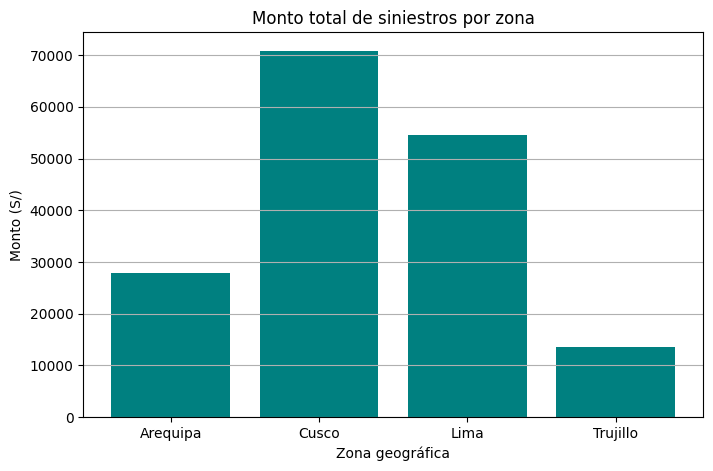

In [4]:
zona_summary = merged.groupby('Zona')['Monto'].sum().reset_index()
plt.figure(figsize=(8,5))
plt.bar(zona_summary['Zona'], zona_summary['Monto'], color='teal')
plt.title('Monto total de siniestros por zona')
plt.xlabel('Zona geográfica')
plt.ylabel('Monto (S/)')
plt.grid(axis='y')
plt.show()